In [ ]:
from PythonSI import FeatureSelectionPipeline
from PythonSI.feature_selection import LassoFeatureSelection
from PythonSI import Data
from PythonSI.test_statistics import SFS_DATestStatistic
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def test_pipeline() -> FeatureSelectionPipeline:
    r"""LASSO feature selection pipeline for testing.
    
    This function constructs a basic feature selection pipeline using
    LASSO regularization without domain adaptation. The pipeline solves
    the optimization problem:
    
    .. math::
        \hat{\boldsymbol{\beta}} = \mathop{\arg \min}_{\boldsymbol{\beta}} \quad 
        \frac{1}{2} \|\mathbf{y} - \mathbf{x}\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_1
    
    where :math:`\lambda = 10` is the regularization parameter.
    
    Returns
    -------
    pipeline : FeatureSelectionPipeline
        Configured feature selection pipeline using LASSO
        
    Notes
    -----
    The pipeline uses empty Data nodes (x, y) that must be populated
    with actual data before execution.
    
    Warnings
    --------
    This pipeline uses SFS_DATestStatistic which may not be appropriate
    for single-domain data. Consider using FSTestStatistic instead.
    
    Examples
    --------
    >>> pipeline = test_pipeline()
    >>> x_data = np.random.randn(100, 10)
    >>> y_data = np.random.randn(100, 1) 
    >>> results = pipeline([x_data, y_data], sigma=np.eye(100))
    """
    x = Data()
    y = Data()
    
    lasso = LassoFeatureSelection(lambda_=10)
    active_set = lasso.run(x, y)
    return FeatureSelectionPipeline(inputs=(x, y), output=active_set, test_statistic=SFS_DATestStatistic(x=x, y=y))

In [ ]:
def gen_data(n, p, true_beta):
    r"""Generate synthetic linear regression data for testing.
    
    Creates a dataset following the linear model:
    
    .. math::
        \mathbf{Y} = \mathbf{x} \boldsymbol{\beta} + \boldsymbol{\epsilon}
    
    where:
    
    - :math:`\mathbf{x} \in \mathbb{R}^{n \times p}` with :math:`x_{ij} \sim \mathcal{N}(0, 1)`
    - :math:`\boldsymbol{\beta} \in \mathbb{R}^p` is the true coefficient vector
    - :math:`\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}_n)` is the noise vector
    
    Parameters
    ----------
    n : int
        Number of samples to generate
    p : int
        Number of features (dimensions)
    true_beta : array-like, shape (p,)
        True coefficient vector for linear relationship
        
    Returns
    -------
    x : array-like, shape (n, p)
        Feature matrix with entries drawn from standard normal distribution
    Y : array-like, shape (n, 1)
        Response vector following the linear model
    Sigma : array-like, shape (n, n)
        Identity covariance matrix for the noise
        
    Examples
    --------
    >>> beta = np.array([1, 0, -2, 0, 0.5])
    >>> x, Y, Sigma = gen_data(100, 5, beta)
    >>> print(x.shape)  # (100, 5)
    >>> print(Y.shape)  # (100, 1)
    """
    x = np.random.normal(loc = 0, scale = 1, size = (n, p))
    true_beta = true_beta.reshape(-1, 1)
    
    mu = x.dot(true_beta)
    Sigma = np.identity(n)
    Y = mu + np.random.normal(loc = 0, scale = 1, size = (n, 1))
    return x, Y, Sigma

In [ ]:
my_pipeline = test_pipeline()

num_iters = 1000
list_p_value = []
for _ in range(num_iters):
    x, y, sigma = gen_data(150, 5, np.asarray([0, 0, 0, 0, 0]))
    selected_features, p_values = my_pipeline([x, y], sigma)
    list_p_value.extend(p_values)

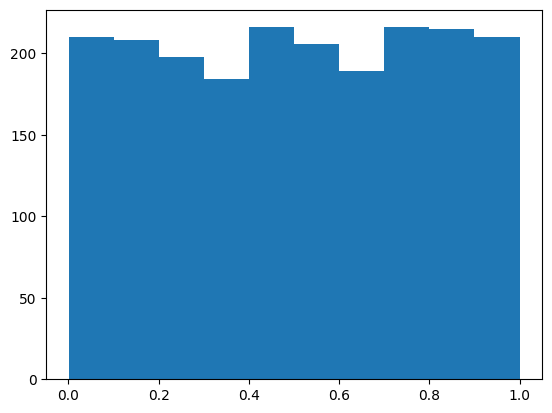

In [5]:
plt.hist(list_p_value)
plt.show()